# Basic descriptive statistics
The term [descriptive statistics](https://en.wikipedia.org/wiki/Descriptive_statistics) refers to methods that allow summarizing collections of data. 

In [1]:
import numpy as np
import pandas as pd
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

To demonstrate the most important methods, we start by defining a dataset first.

In [2]:
measurements = [7, 5, 5, 6, 6, 7, 8, 7, 2, 4, 6, 4, 1, 6, 4, 5, 2, 7, 6, 5, 9, 5, 6, 3, 4, 8, 6, 2, 4, 6, 5, 4, 1, 5, 6, 7, 8, 3, 4, 5, 8, 6, 3, 7, 6, 9]
print(measurements)

[7, 5, 5, 6, 6, 7, 8, 7, 2, 4, 6, 4, 1, 6, 4, 5, 2, 7, 6, 5, 9, 5, 6, 3, 4, 8, 6, 2, 4, 6, 5, 4, 1, 5, 6, 7, 8, 3, 4, 5, 8, 6, 3, 7, 6, 9]


Let's plot a histogram of our data to get a feel for the distribution.

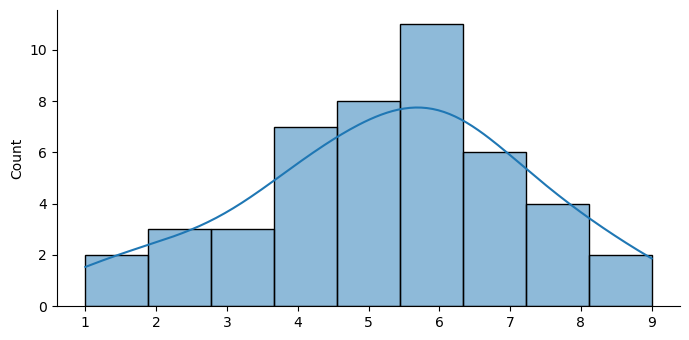

In [3]:
sns.displot(measurements, 
            bins=9, 
            kde=True,
            height=3.5,
            aspect=2)

## Measurements of central tendency
We can measure the _location_ of our `measurement` in space using [numpy's statistics functions](https://numpy.org/doc/stable/reference/routines.statistics.html) and Python's [statistics module](https://docs.python.org/3/library/statistics.html).

In [4]:
mode = statistics.mode(measurements)
mode

6

In [5]:
median = np.median(measurements)
median

5.5

In [6]:
mean = np.mean(measurements)
mean

5.282608695652174

## Measurements of spread
Numpy also allows measuring the spread of `measurements`.

In [7]:
standard_deviation = np.std(measurements)
standard_deviation

1.96339372868445

In [8]:
variance = np.var(measurements)
variance

3.8549149338374282

In [9]:
np.min(measurements), np.max(measurements)

(1, 9)

In [10]:
np.percentile(measurements, [25, 50, 75])

array([4.  , 5.5 , 6.75])

In [11]:
np.quantile(measurements, [0.25, .50, .75])

array([4.  , 5.5 , 6.75])

With the array sorted, it is easier to interpret some of these measurements. We can sort a list like this.

In [12]:
print(sorted(measurements))

[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9]


## Testing Whether the Data is Normal (Gaussian) Distributed

Many parametric statistical tests assume that your data is normally distributed. Before you use such a test, it is wise to test your data for normality. Commonly, this is done by the [D’Agostino’s K-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) (`scipy.stats.normaltest`) other possibilities are the [Shapiro-Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html?highlight=shapiro) (`scipy.stats.shapiro`) or the [Anderson-Darling test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html) (`scipy.stats.anderson`). 

Note that some sources also recommend the [Kolmogorov-Smirnov Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) (`scipy.stats.kstest`), which is a general tests for goodness of fit. When testing against a standard normal distribution, the results are only valid, if the data was normalized before the test (i.e. has a mean of 0 and a standard deviation of 1).

In [13]:
stats.normaltest(measurements)

NormaltestResult(statistic=0.8221865757355512, pvalue=0.6629250858482892)

The pvalue is greater than 0.05, meaning that the null hypothesis, that the data was drawn from a normal distribution was not rejected. I.e. we can assume that the data is normal distributed and use parametric tests.

## Skewness

Skewness is a measure of the asymetry of a distribution. Typically, positive values indicate a tail to the right, as shown below, while negative indicate a tail to the left. Values close to zero mean a symetric distribution.

In [14]:
# Fixed seed for reproducibility
np.random.seed(4)

(array([12., 10., 16., 12., 19., 23.,  2.,  2.,  2.,  2.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

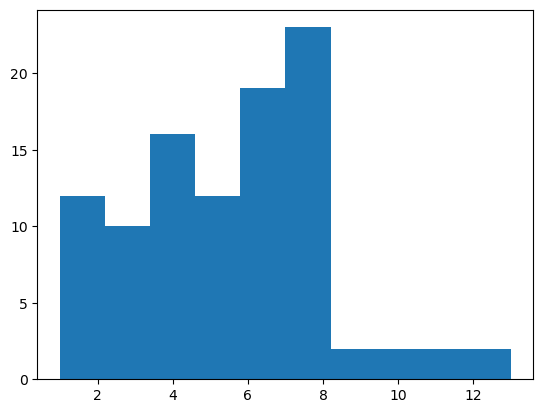

In [15]:
samples = np.random.poisson(lam = mean, size = 100)
plt.hist(samples)

In [16]:
stats.skew(samples)

0.5144761536788754

Let's check now the skewness of a normal distribution.

(array([ 2.,  5., 11., 14., 16., 17., 12., 10.,  9.,  4.]),
 array([0.95507676, 1.83302436, 2.71097195, 3.58891955, 4.46686714,
        5.34481474, 6.22276233, 7.10070992, 7.97865752, 8.85660511,
        9.73455271]),
 <BarContainer object of 10 artists>)

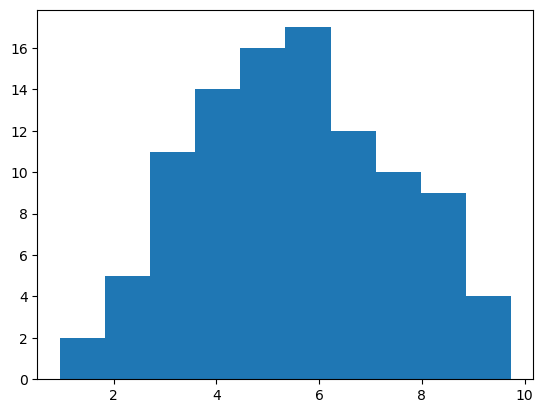

In [17]:
samples = np.random.normal(loc = mean, scale = standard_deviation, size = 100)
plt.hist(samples)

In [18]:
stats.skew(samples)

-0.023475210203459915

# Bootstrapping

A big drawback of a statistical test that spits out a p-value is, that we need to understand how the statistical test works and which assumptions it makes in order to be sure that the result is reliable (and even then, the result may be not as reliable as the p-value suggests, cf [The Statistical Crisis in Science](https://www.americanscientist.org/article/the-statistical-crisis-in-science)).

A more transparent way to judge the significance of the differences is to calculate confidence intervals and check if they overlap. We highly recommend reading [Justin Bois' statistics lessons on confidence intervals](https://justinbois.github.io/dd-pol/2022/lessons/04/confidence_intervals.html). Briefly, “If an experiment is repeated over and over again, the estimate I compute for a parameter, $\hat\theta$, will lie between the bounds of the 95% confidence interval for 95% of the experiments”. Or more loosely formulated, if I estimate that the true value lies within the 95% confidence interval, I am correct 95% of the time.

We will use bootstrapping to estimate the 95% confidence intervals. Again, refer to [Justin's lessons](https://justinbois.github.io/dd-pol/2022/lessons/04/confidence_intervals.html) for an excellent explanation. Briefly, the recipe for generating a bootstrap [95%] confidence interval is as follows.
1. Generate $B$ independent bootstrap samples. Each one is generated by drawing $n$ values out of the data array with replacement. Where $n$ is the number of measurements in the original experiment.
2. Compute $\hat\theta^∗$ for each bootstrap sample to get the bootstrap replicates. 
3. The central 95% confidence interval consists of the percentiles 2.5 and 97.5 of the bootstrap replicates.”



## Resampling demo
Here is an example to demonstrate the resampling. We will use mean as our $\hat\theta$



In [19]:
# Fixed seed for reproducibility
np.random.seed(4)

# use np.random.normal to simulate 20 measurements (size=20) drawn from a normal distribution 
# with true mean 5 (loc=5) and standard deviation 10 (scale=10)
experiment = np.random.normal(size=20, loc=5, scale=10)

# put the measurements into a pandas dataframe
measured = pd.DataFrame({'measured': experiment})

# calculate the mean
print(measured['measured'].mean())

# show the pandas dataframe
measured

4.7863620427709455


,measured
0,5.505617
1,9.999513
2,-4.959089
3,11.935985
4,0.816985
5,-10.845772
6,-1.477068
7,10.985752
8,8.322500
9,-6.474766


In [20]:
# resample the measurements (np.random.choice)
resampled_index = np.random.choice(measured.index, size=measured.shape[0])

# put the results into a pandas dataframe, calculate the mean and show the output as we did above
resampled = pd.DataFrame({'resampled': measured['measured'][resampled_index]})

# calculate the mean
print(resampled['resampled'].mean())

# show the pandas dataframe
resampled

7.038275740527368


,resampled
17,20.469793
16,-1.068873
17,20.469793
9,-6.474766
16,-1.068873
12,9.250724
18,12.233416
3,11.935985
11,4.120131
18,12.233416


Run the previous cell multiple times to see how the output changes.

In [21]:
# let's create 1000 bootstrap samples for the mean and calculate the 95% confidence interval
bootstrap_size = 1000
bootstrap_samples = np.empty((bootstrap_size,))
for i in range(bootstrap_size):
    resampled_index = np.random.choice(measured.index, size=measured.shape[0])
    bootstrap_samples[i] = measured['measured'][resampled_index].mean()

confidence_interval = np.percentile(bootstrap_samples, [2.5, 97.5])
confidence_interval

array([1.40321507, 8.1937104 ])

How does our true mean compare to the 95% confidence interval?


In [22]:
#Try the same with `np.median`


# Some real data: Microtubules gliding over a glass surface propelled by kinesin-1 motor proteins

The [dataset](https://zenodo.org/record/7403517) consists of timelapse fluorescence micrographs. A tracking algorithm was applied to the micrographs and tracked the microtubule tips over time to measure their velocity as described in this figure from the [original publication by Korten et al. 2018](https://pubs.rsc.org/en/content/articlehtml/2018/lc/c8lc00547h) ([CC-BY-NC 3.0](http://creativecommons.org/licenses/by-nc/3.0/)): 

<img src="https://github.com/BiAPoL/Image-data-science-with-Python-and-Napari-EPFL2022/raw/main/docs/day4c_Statistics/microtubuledata.jpg" width=400> 



First, we load the data. Since the data is in a matlab file, we use `loadmat` from `scipy.io`.

In [1]:
from scipy.io import loadmat

data = loadmat('../../data/microtubule_tracking/summary.mat')

## Data wrangling

The output of loadmat is quite a mess. Therefore, we need to do some data wrangling to get the data into a tidy pandas dataframe.

In [24]:

df = pd.DataFrame()
microtubule_id = 0
for i, amppnp_concentration in enumerate(data['concentrations']):
    all_frame_to_frame_velocities = data['allSpeeds'][i][0]
    for j in range(all_frame_to_frame_velocities.shape[1]):
        df = pd.concat([df, pd.DataFrame({'AMPPNP concentration': amppnp_concentration[0], 'file name': data['fileNames'][i][0][0], 'microtubule ID': microtubule_id, 'frame-to-frame microtubule tip velocity': all_frame_to_frame_velocities[:, j]})], ignore_index=True)
        microtubule_id += 1
df = df.dropna()
df


,AMPPNP concentration,file name,microtubule ID,frame-to-frame microtubule tip velocity
0,100,2015-12-12_Run_1_AMPPNP_row_1_0100_1_119.nd2,0,889.268843
1,100,2015-12-12_Run_1_AMPPNP_row_1_0100_1_119.nd2,0,859.854055
2,100,2015-12-12_Run_1_AMPPNP_row_1_0100_1_119.nd2,0,493.120518
3,100,2015-12-12_Run_1_AMPPNP_row_1_0100_1_119.nd2,0,792.180836
4,100,2015-12-12_Run_1_AMPPNP_row_1_0100_1_119.nd2,0,963.193758
...,...,...,...,...
44828,0,2015-12-12_Run_1_AMPPNP_row_1_ATP_2_108.nd2,4482,701.328330
44829,0,2015-12-12_Run_1_AMPPNP_row_1_ATP_2_108.nd2,4482,807.595722
44837,0,2015-12-12_Run_1_AMPPNP_row_1_ATP_2_108.nd2,4483,691.523977
44838,0,2015-12-12_Run_1_AMPPNP_row_1_ATP_2_108.nd2,4483,868.650138


Let's plot the median microtubule velocities for each AMPPNP concentration

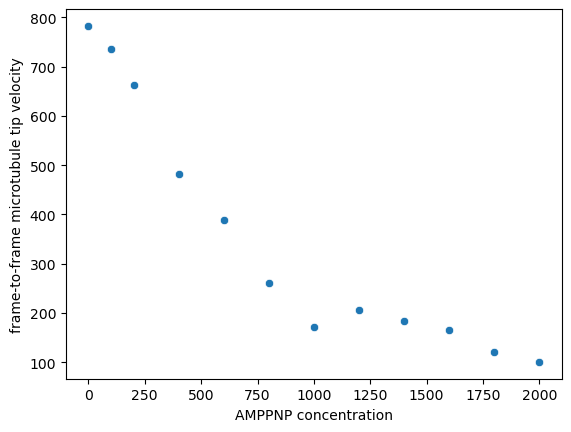

In [25]:
# get the columns AMPPNP concentration and frame-to-frame microtubule tip velocity
concentration_velocity = df[['AMPPNP concentration','frame-to-frame microtubule tip velocity']]

# use the `groupby` method of pandas to calculate the median velocity for each AMPPNP concentration
concentration_median_velocity = concentration_velocity.groupby(['AMPPNP concentration']).median()

# use seaborn for plotting
plot = sns.scatterplot(concentration_median_velocity, x='AMPPNP concentration', y='frame-to-frame microtubule tip velocity')


Above, we assumed that both controls have the same median. Let's check that assumption:

In [26]:
# Extract the controls from the dataframe
controls = df[df['AMPPNP concentration']==0]

# Calculate the median using pandas `groupby` method
controls[['file name', 'frame-to-frame microtubule tip velocity']].groupby('file name').median()

,frame-to-frame microtubule tip velocity
file name,
2015-12-12_Run_1_AMPPNP_row_1_ATP_1_107.nd2,779.605417
2015-12-12_Run_1_AMPPNP_row_1_ATP_2_108.nd2,786.234078


The values are close, but maybe the difference is still significant?

Let's use bootstrapping to find out.

## Apply bootstrapping to the data

Remember how we only changed one line in the code above to calculate the confidence intervals for different parameters $\hat\theta$? That meant we were repeating ourselves. So let's write a function to avoid having to repeat ourselves now when we calculate the bootstrap intevals for our different controls.

In [27]:
def get_confidence_interval_by_bootstrapping(measurements:pd.DataFrame, bootstrap_size: int = 1000, alpha: float = 0.05):
    '''Estimate confidence intervals for data in a pandas dataframe by bootstrapping'''
    bootstrap_samples = np.empty((bootstrap_size,))
    for i in range(bootstrap_size):
        resample_index = np.random.choice(measurements.index,size=measurements.shape[0])
        bootstrap_samples[i] = np.median(measurements['frame-to-frame microtubule tip velocity'][resample_index])
    lower_bound = alpha * 100 / 2
    upper_bound = 100 - lower_bound
    return np.percentile(bootstrap_samples,[lower_bound, upper_bound])

In [28]:
# Fixed seed for reproducibility
np.random.seed(42)

# extract data for the individual controls
control1 = controls[controls['file name'] == '2015-12-12_Run_1_AMPPNP_row_1_ATP_1_107.nd2']
control2 = controls[controls['file name'] == '2015-12-12_Run_1_AMPPNP_row_1_ATP_2_108.nd2']

confidence_interval1 = get_confidence_interval_by_bootstrapping(control1)
confidence_interval2 = get_confidence_interval_by_bootstrapping(control2)
print('Confidence interval 1: {}\nConfidence interval 2: {}'.format(confidence_interval1, confidence_interval2))


Confidence interval 1: [774.35920781 785.24821312]
Confidence interval 2: [778.20041853 793.3309894 ]


Our confidence intervals are overlapping, so it was o.k. to combine them in our graph above.

In [29]:
df.head()

,AMPPNP concentration,file name,microtubule ID,frame-to-frame microtubule tip velocity
0,100,2015-12-12_Run_1_AMPPNP_row_1_0100_1_119.nd2,0,889.268843
1,100,2015-12-12_Run_1_AMPPNP_row_1_0100_1_119.nd2,0,859.854055
2,100,2015-12-12_Run_1_AMPPNP_row_1_0100_1_119.nd2,0,493.120518
3,100,2015-12-12_Run_1_AMPPNP_row_1_0100_1_119.nd2,0,792.180836
4,100,2015-12-12_Run_1_AMPPNP_row_1_0100_1_119.nd2,0,963.193758


# Exercises - Improving performance

Depending on the size of your data and the complexity of the function you use to calculate $\hat\theta$, bootstrapping can take quite some time. The computational effort required for bootsrapping was the reason, why bootstrapping was not immediately adopted by the scientific community at the time it was invented by Bradley Efron in 1979. But nowadays, with powerful computers widely available, that is not a problem any more. Considering that your experiment probably took days or even weeks, it is o.k. if the data analysis takes a few minutes or even hours. Consider it a matter of respect for your data to analyze it properly.

However, in our case, there is actually something we can do about the time the calculations are taking. Pandas is nice and all, but performance is not its strong suit. Numpy is much faster - particularly in combination with just-in-time compilation facilitated by numba. 

## Exercise 1
Let's convert our data to numpy arrays and try `get_confidence_interval_by_bootstrapping` again.

Tip: the numpy data can be retrieved from the `values` property of the pandas dataframe

## Exercise 2
Let's make our function more modular, so we don't need to rewrite the whole thing every time we change the data type.
Split the function into three parts:


In [30]:
#Turn get_confidence_interval_by_bootstrapping
# into three functions:
def draw_bootstrap_sample(measurements: np.ndarray):
    """Draw a bootstrap sample from a 1D data set."""
    
def bootstrap_median(measurements: np.ndarray, bootstrap_size=1000):
    """Apply a function to many boostrap samples."""

def get_confidence_interval(boostrap_replicates: np.ndarray, alpha: float = 0.05):
    """Calculate the confidence interval with conficence level alpha from bootstrap replicates"""


## Exercise 3:

Apply your new functions to the data to calculate confidence intervals. Make sure that the results are the same as before

## Exercise 4:

Let's benchmark our two functions using the `%timeit` jupyter magic:


In [31]:

print('pandas:')
%timeit 

print('numpy/numba:')
%timeit 


pandas:
numpy/numba:
